<a href="https://colab.research.google.com/github/Randasabag/Projet-5-ML/blob/main/Copie_de_P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie 1 : Librairies et Données

In [2]:
import numpy
print(numpy.__version__)

import scipy
print(scipy.__version__)

import gensim
print(gensim.__version__)

#from gensim import corpora

1.26.4
1.13.1


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


4.3.3


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime,date,timedelta
import datetime as dt
import time
from wordcloud import WordCloud # Visualisation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import words
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import label_ranking_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')
from transformers import AutoTokenizer, DistilBertModel
import torch
import os
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
import mlflow
from mlflow.models import infer_signature

/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# NOTE: review the links mentioned above for guidance on connecting to a managed tracking server, such as the free Databricks Community Edition

mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

In [12]:
df=pd.read_csv('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/QueryResultsP5.csv', sep=',')
df.head()

,LastActivityDate,Title,Tags,Score
0,2022-08-29 20:14:36,Determine the type of an object?,<python><dictionary><types><typeof>,2164
1,2022-07-02 05:29:08,Why can't Python parse this JSON data?,<python><json><parsing>,1503
2,2023-11-20 22:23:13,Best way to convert string to bytes in Python 3?,<python><string><character-encoding><python-3.x>,1482
3,2022-11-09 15:44:56,Display number with leading zeros,<python><integer><string-formatting>,1419
4,2023-07-28 17:04:02,Create a Pandas Dataframe by appending one row...,<python><pandas><dataframe><append>,1399


# Partie 2 : Exploratory Data Analysis

In [13]:
print(df.shape)

(50, 4)


In [14]:
df.isnull().sum()

LastActivityDate    0
Title               0
Tags                0
Score               0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.dtypes

LastActivityDate    object
Title               object
Tags                object
Score                int64
dtype: object

In [17]:
df['Title'].nunique()

50

In [18]:
df['Tags'].nunique()

47

In [19]:
df['Score'].nunique()

48

In [20]:
#Résumé stat
df.describe(include="all").round(2)

,LastActivityDate,Title,Tags,Score
count,50,50,50,50.00
unique,50,50,47,NaN
top,2022-08-29 20:14:36,Determine the type of an object?,<python>,NaN
freq,1,1,3,NaN
mean,NaN,NaN,NaN,563.28
std,NaN,NaN,NaN,406.65
min,NaN,NaN,NaN,259.00
25%,NaN,NaN,NaN,321.50
50%,NaN,NaN,NaN,406.50
75%,NaN,NaN,NaN,607.00


In [21]:
df.columns

Index(['LastActivityDate', 'Title', 'Tags', 'Score'], dtype='object')

## Outliers

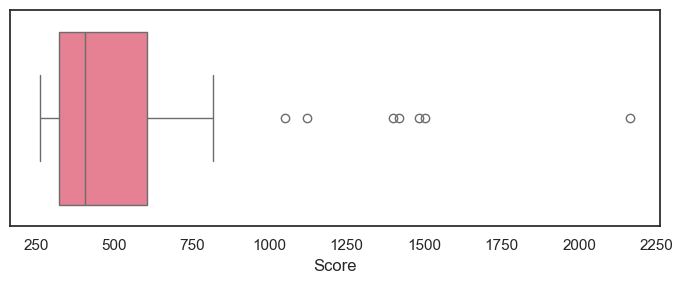

In [22]:
# Visualisation des outliers
plt.figure(figsize=(7, 3))
sns.set(style="white", palette="husl")
sns.boxplot(data=df, x='Score')

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("boxplots_outliers.png")

## Histogramme

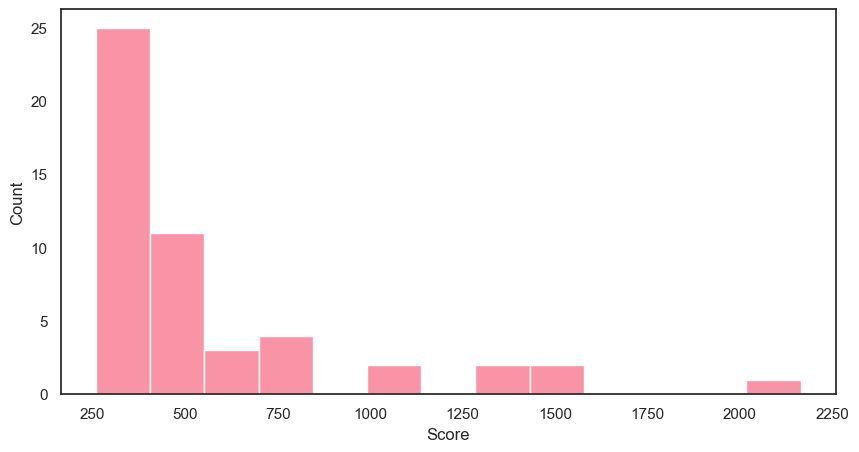

<Figure size 640x480 with 0 Axes>

In [23]:
# Visualisation des histogrammes de la variable Score
plt.figure(figsize=(10, 5))
sns.set(style="white", palette="husl")
sns.histplot(data=df, x='Score')
plt.show()

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("hist.png")

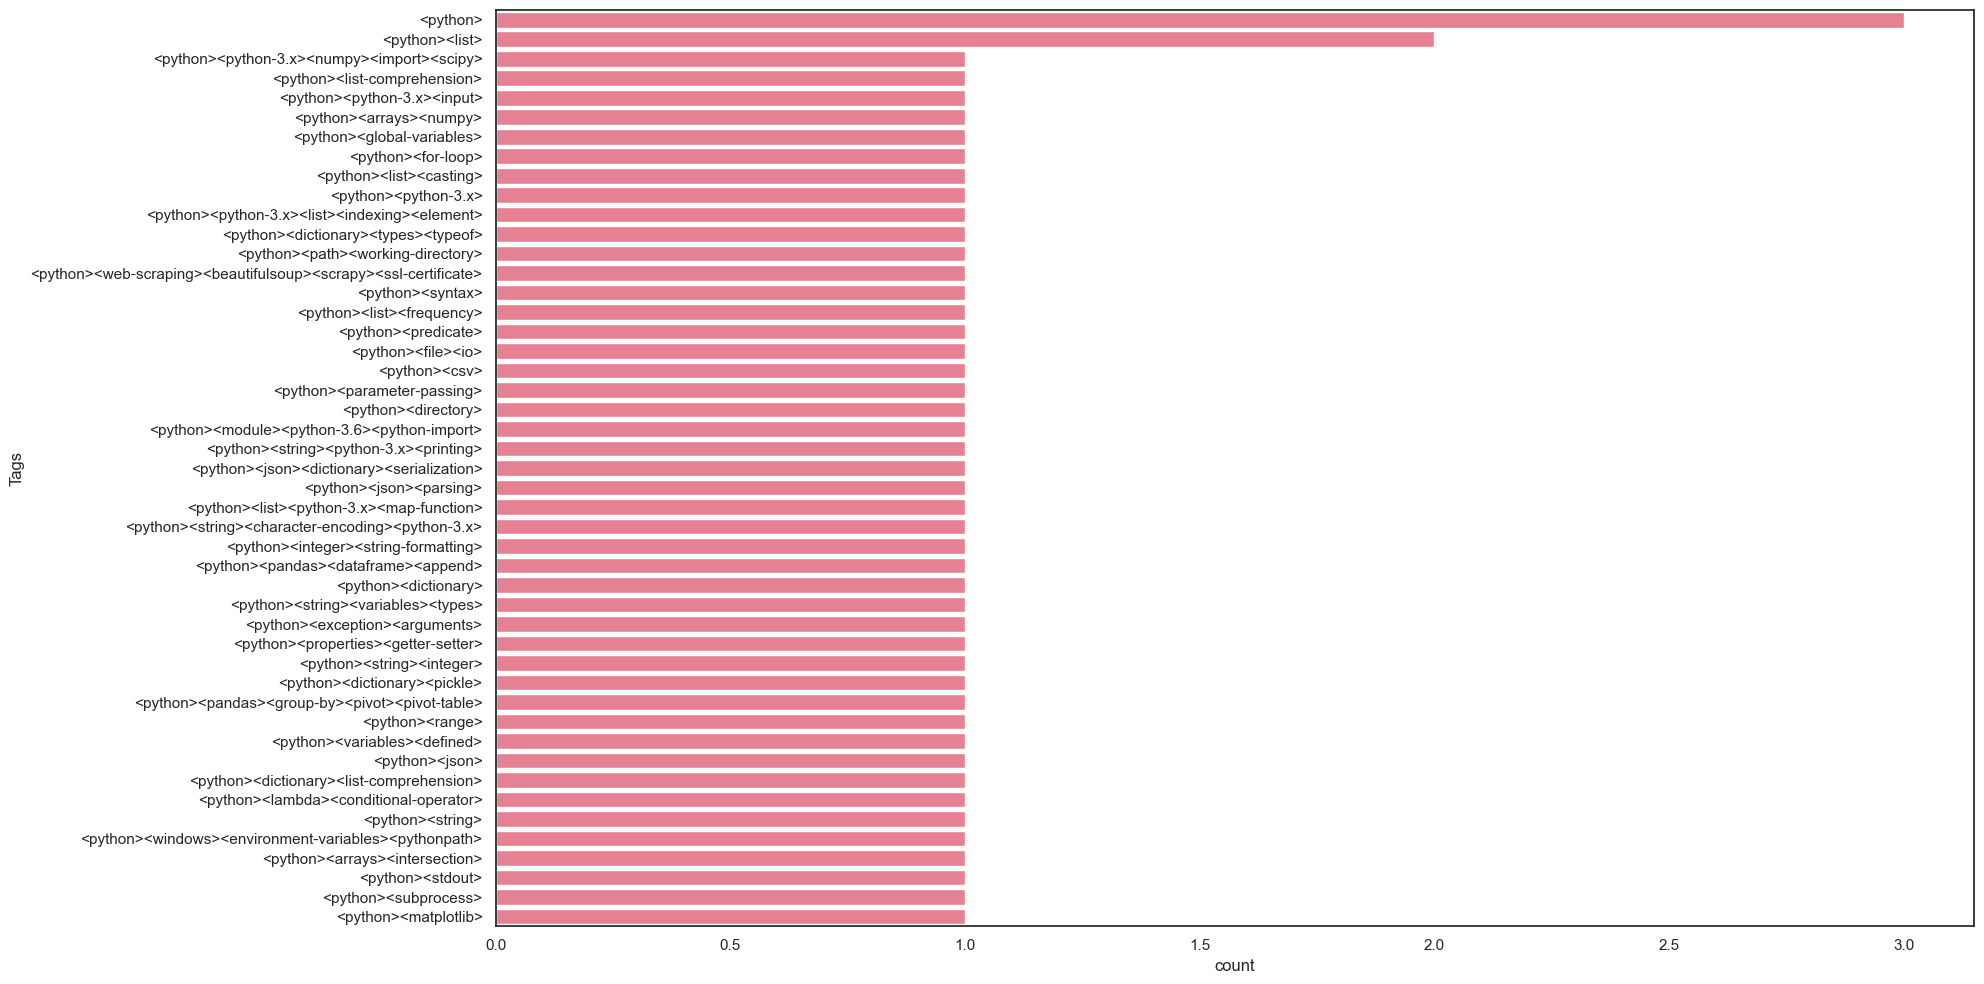

In [24]:
# Visualisation des histogrammes de la variable tags
plt.figure(figsize=(20, 10))
sns.set(style="white", palette="husl")
sns.countplot(data=df, y='Tags', order=df['Tags'].value_counts(ascending=False).index)

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("tags.png")

## WordCloud

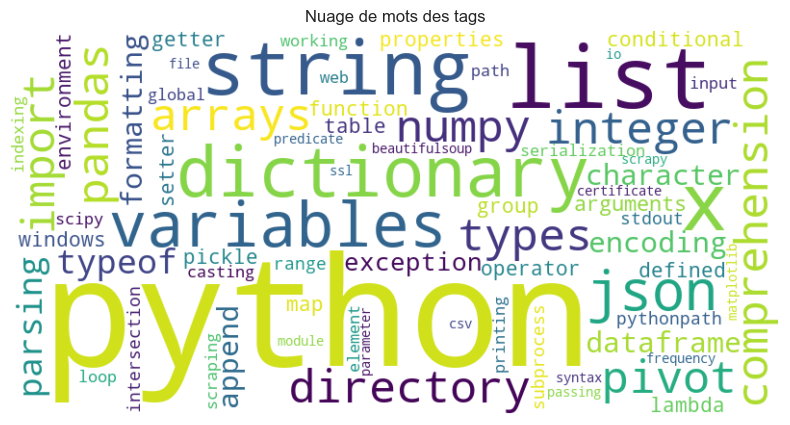

In [25]:
# Convertir la liste en une chaîne de caractères
text = ' '.join(df['Tags'])

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des tags')
plt.show()

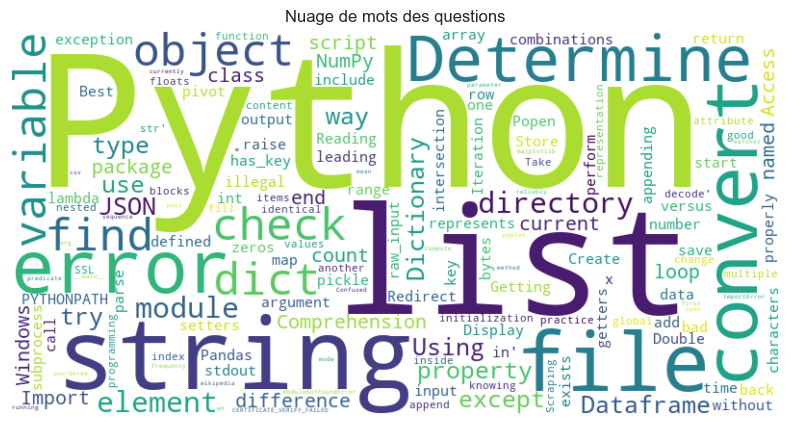

In [26]:
# Convertir la liste en une chaîne de caractères
text = ' '.join(df['Title'])

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des questions')
plt.show()

In [27]:
for index, vect in df.iterrows():
  print(vect['Title'])

Determine the type of an object?
Why can't Python parse this JSON data?
Best way to convert string to bytes in Python 3?
Display number with leading zeros
Create a Pandas Dataframe by appending one row at a time
Should I use 'has_key()' or 'in' on Python dicts?
How to check if type of a variable is string?
Which exception should I raise on bad/illegal argument combinations in Python?
Using @property versus getters and setters
How can I check if a string represents an int, without using try/except?
How can I use pickle to save a dict (or any other Python object)?
Getting a map() to return a list in Python 3.x
How can I pivot a dataframe?
Determine if variable is defined in Python
Reading JSON from a file
Python Dictionary Comprehension
Is there a way to perform "if" in python's lambda?
Convert a list of characters into a string
How to add to the PYTHONPATH in Windows, so it finds my modules/packages?
How to find list intersection?
Redirect stdout to a file in Python?
Store output of sub

In [28]:
for index, vect in df.iterrows():
  print(vect['Tags'])

<python><dictionary><types><typeof>
<python><json><parsing>
<python><string><character-encoding><python-3.x>
<python><integer><string-formatting>
<python><pandas><dataframe><append>
<python><dictionary>
<python><string><variables><types>
<python><exception><arguments>
<python><properties><getter-setter>
<python><string><integer>
<python><dictionary><pickle>
<python><list><python-3.x><map-function>
<python><pandas><group-by><pivot><pivot-table>
<python><variables><defined>
<python><json>
<python><dictionary><list-comprehension>
<python><lambda><conditional-operator>
<python><string>
<python><windows><environment-variables><pythonpath>
<python><arrays><intersection>
<python><stdout>
<python><subprocess>
<python><range>
<python><json><dictionary><serialization>
<python><path><working-directory>
<python>
<python><list-comprehension>
<python><python-3.x><input>
<python><arrays><numpy>
<python><global-variables>
<python><for-loop>
<python><list><casting>
<python><python-3.x>
<python><python-

# Partie 3 : Analyse textuelle


In [29]:
# Fixer la graine aléatoire pour stabiliser l'échantillonnage
#np.random.seed(42)

In [30]:
doc = df.Title
doc

0                      Determine the type of an object?
1                Why can't Python parse this JSON data?
2      Best way to convert string to bytes in Python 3?
3                     Display number with leading zeros
4     Create a Pandas Dataframe by appending one row...
5     Should I use 'has_key()' or 'in' on Python dicts?
6         How to check if type of a variable is string?
7     Which exception should I raise on bad/illegal ...
8            Using @property versus getters and setters
9     How can I check if a string represents an int,...
10    How can I use pickle to save a dict (or any ot...
11       Getting a map() to return a list in Python 3.x
12                         How can I pivot a dataframe?
13           Determine if variable is defined in Python
14                             Reading JSON from a file
15                      Python Dictionary Comprehension
16    Is there a way to perform "if" in python's lam...
17           Convert a list of characters into a

In [33]:
# Tokenizer
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize

# Séparer par mot (tableaux de mots)
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ').replace('_', ' ').replace("'", ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')', '_', 'how', 'are', "can't", 'en', 'has', 'in', 'pas']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2
 
# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
                                      #and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer
def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text


# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    # sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

df['sentence_bow'] = df['Title'].apply(lambda x : transform_bow_fct(x))
df['sentence_bow_lem'] = df['Title'].apply(lambda x : transform_bow_lem_fct(x))
df['sentence_dl'] = df['Title'].apply(lambda x : transform_dl_fct(x))
df.shape
df

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/randaalsabbagh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,LastActivityDate,Title,Tags,Score,sentence_bow,sentence_bow_lem,sentence_dl
0,2022-08-29 20:14:36,Determine the type of an object?,<python><dictionary><types><typeof>,2164,determine type object,determine type object,determine the type of an object ?
1,2022-07-02 05:29:08,Why can't Python parse this JSON data?,<python><json><parsing>,1503,why python parse json data,why python parse json data,why can t python parse this json data ?
2,2023-11-20 22:23:13,Best way to convert string to bytes in Python 3?,<python><string><character-encoding><python-3.x>,1482,best way convert string bytes python,best way convert string byte python,best way to convert string to bytes in python 3 ?
3,2022-11-09 15:44:56,Display number with leading zeros,<python><integer><string-formatting>,1419,display number leading zeros,display number leading zero,display number with leading zeros
4,2023-07-28 17:04:02,Create a Pandas Dataframe by appending one row...,<python><pandas><dataframe><append>,1399,create pandas dataframe appending one row time,create panda dataframe appending one row time,create a pandas dataframe by appending one row...
5,2022-11-23 08:30:50,Should I use 'has_key()' or 'in' on Python dicts?,<python><dictionary>,1122,should use key python dicts,should use key python dicts,should i use has key ( ) or in on python dicts ?
6,2022-08-15 07:57:04,How to check if type of a variable is string?,<python><string><variables><types>,1051,how check type variable string,how check type variable string,how to check if type of a variable is string ?
7,2023-01-27 10:02:02,Which exception should I raise on bad/illegal ...,<python><exception><arguments>,820,which exception raise bad illegal argument com...,which exception raise bad illegal argument com...,which exception should i raise on bad illegal ...
8,2022-05-31 17:20:40,Using @property versus getters and setters,<python><properties><getter-setter>,798,using property versus getters setters,using property versus getters setter,using property versus getters and setters
9,2023-01-29 17:03:17,"How can I check if a string represents an int,...",<python><string><integer>,733,how check string represents int without using ...,how check string represents int without using ...,how can i check if a string represents an int ...


In [34]:
# Enregistrer le DataFrame en CSV
df.to_csv('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/df_net.csv', index=False)

In [35]:
df['sentence_bow']

0                                 determine type object
1                            why python parse json data
2                  best way convert string bytes python
3                          display number leading zeros
4        create pandas dataframe appending one row time
5                           should use key python dicts
6                        how check type variable string
7     which exception raise bad illegal argument com...
8                 using property versus getters setters
9     how check string represents int without using ...
10               how use pickle save dict python object
11                   getting map return list python 3.x
12                                  how pivot dataframe
13                    determine variable defined python
14                                    reading json file
15                      python dictionary comprehension
16                            way perform python lambda
17                       convert list characters

In [36]:
transform_bow_fct(text) 

'determine type object why python parse json data best way convert string bytes python display number leading zeros create pandas dataframe appending one row time should use key python dicts how check type variable string which exception raise bad illegal argument combinations python using property versus getters setters how check string represents int without using try except how use pickle save dict python object getting map return list python 3.x how pivot dataframe determine variable defined python reading json file python dictionary comprehension way perform python lambda convert list characters string how add pythonpath windows finds modules packages how find list intersection redirect stdout file python store output subprocess.popen call string why range start end include end convert python dict string back how properly determine current script directory how check key exists dictionary double iteration list comprehension what difference raw input input python numpy array initial

In [37]:
tokenizer_fct("Should I use 'has_key()' or 'in' on Python dicts?")

['Should',
 'I',
 'use',
 'has',
 'key',
 '(',
 ')',
 'or',
 'in',
 'on',
 'Python',
 'dicts',
 '?']

In [38]:
df.to_csv("data_titres.csv")

In [39]:
df =  pd.read_csv("data_titres.csv")
print(df.shape)

(50, 8)


In [40]:
df['length_bow'] = df['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", df['length_bow'].max())
df['length_bow_lem'] = df['sentence_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length bow lem : ", df['length_bow_lem'].max())
df['length_dl'] = df['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", df['length_dl'].max())

max length bow :  9
max length bow lem :  9
max length dl :  21


# Partie 4 : Extraction de caractéristiques

## Bag-of-words (bow)

On va transformer le vecteur corpus qui contient des chaînes de caractères en une matrice d’entiers.

La matrice contient autant de colonnes que de mots possibles dans le corpus.

On compte le nombre d’occurrences du mot dans chaque question.

In [41]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer
def color(val):
    
    color = 'blue' if val > 0 else ''
    return 'background-color: %s' % color

cv = CountVectorizer()
feat = 'sentence_bow_lem'
cv_transform = cv.fit_transform(df[feat])
cv_feature_names = cv.get_feature_names_out()
print('Term Frequency of Document')
dfcv = pd.DataFrame(cv_transform.toarray(), columns = cv_feature_names) / len(cv_feature_names)
dfcv.style.set_caption("Term Frequency of Document")
dfcv.style.applymap(color)

Term Frequency of Document


In [42]:
dfcv.columns

Index(['access', 'add', 'another', 'append', 'appending', 'are', 'argument',
       'array', 'attribute', 'back',
       ...
       'verify', 'versus', 'way', 'what', 'which', 'why', 'wikipedia',
       'window', 'without', 'zero'],
      dtype='object', length=164)

In [43]:
# pourcentage de valeurs # 0
full_dense = cv_transform.todense()
print("Full_doc sparsicity: {:.3f} %"\
      .format(((full_dense > 0).sum()/full_dense.size)*100))

Full_doc sparsicity: 3.207 %


## TF-IDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
feat = 'sentence_bow_lem'
tf_transform = tf.fit_transform(df[feat])
tf_feature_names = tf.get_feature_names_out()
print('Term Frequency - Inverse Document Frequency of Document')
dftf = pd.DataFrame(tf_transform.toarray(), columns = tf_feature_names) / len(tf_feature_names)
dftf.style.set_caption("Term Frequency of Document")
dftf.style.applymap(color)

Term Frequency - Inverse Document Frequency of Document


In [45]:
tf_feature_names

array(['access', 'add', 'another', 'append', 'appending', 'are',
       'argument', 'array', 'attribute', 'back', 'bad', 'best', 'block',
       'byte', 'call', 'certificate', 'change', 'character', 'check',
       'class', 'combination', 'comprehension', 'compute', 'confused',
       'content', 'convert', 'count', 'create', 'csv', 'current',
       'currently', 'data', 'dataframe', 'decode', 'defined', 'determine',
       'dict', 'dictionary', 'dicts', 'difference', 'directory',
       'display', 'double', 'element', 'en', 'end', 'error', 'except',
       'exception', 'exists', 'failed', 'file', 'fill', 'find', 'first',
       'float', 'frequency', 'function', 'get', 'getters', 'getting',
       'global', 'good', 'how', 'identical', 'illegal', 'import',
       'importerror', 'include', 'index', 'initialization', 'input',
       'inside', 'int', 'intersection', 'item', 'iteration', 'json',
       'key', 'knowing', 'lambda', 'leading', 'list', 'loop', 'main',
       'map', 'match', 'mat

In [46]:
dftf.columns

Index(['access', 'add', 'another', 'append', 'appending', 'are', 'argument',
       'array', 'attribute', 'back',
       ...
       'verify', 'versus', 'way', 'what', 'which', 'why', 'wikipedia',
       'window', 'without', 'zero'],
      dtype='object', length=164)

In [47]:
full_dense = tf_transform.todense()
print("Full_doc sparsicity: {:.3f} %"\
      .format(((full_dense > 0).sum()/full_dense.size)*100))

Full_doc sparsicity: 3.207 %


# Partie 5 : Méthode non supervisée

## LDA

Latent Dirichlet Allocation : méthode non-supervisée générative

In [48]:
from gensim import corpora

# Creating document-term matrix 
text_list = df[feat].tolist()
print(text_list)
# Créer une liste de listes de mots (tokens) à partir des phrases
documents = [text.split() for text in df[feat]]
dictionary = corpora.Dictionary(documents)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in documents]

# Afficher le dictionnaire et la matrice document-termes
print("Dictionnaire :", dictionary)
for doc, bow in zip(documents, doc_term_matrix):
    print(f"Phrase : {doc}")
    print(f"Bag of Words : {bow}")
    print()

['determine type object', 'why python parse json data', 'best way convert string byte python', 'display number leading zero', 'create panda dataframe appending one row time', 'should use key python dicts', 'how check type variable string', 'which exception raise bad illegal argument combination python', 'using property versus getters setter', 'how check string represents int without using try except', 'how use pickle save dict python object', 'getting map return list python 3.x', 'how pivot dataframe', 'determine variable defined python', 'reading json file', 'python dictionary comprehension', 'way perform python lambda', 'convert list character string', 'how add pythonpath window find module package', 'how find list intersection', 'redirect stdout file python', 'store output subprocess.popen call string', 'why range start end include end', 'convert python dict string back', 'how properly determine current script directory', 'how check key exists dictionary', 'double iteration list com

In [50]:
from gensim.models import LdaModel
import gensim
from gensim import corpora
  
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel


# LDA model
# chunksize détermine le nombre de documents à traiter en une seule fois (ou en un seul "chunk")
# passes indique le nombre de fois que l'algorithme doit passer sur l'ensemble complet des documents
# iterations détermine le nombre d'itérations à effectuer pour chaque passe.
lda = LdaModel(doc_term_matrix, num_topics=10, id2word = dictionary, random_state=0, chunksize=1000, passes=10, iterations=100)

# affiche les num_topics (10 ici) sujets les plus importants, en montrant les num_words (3 ici) mots les plus significatifs 
# pour chaque sujet. Cela donne un aperçu rapide des principaux thèmes détectés par le modèle  
print("3 mots les plus significatifs pour chaque topic:")
print(lda.print_topics(num_topics=10, num_words=3))
print("\n")

# Récupère les num_topics (10) sujets les plus importants, en montrant les num_words (10) mots les plus significatifs 
# pour chaque sujet. Le paramètre formatted=False renvoie les résultats sous forme de liste de tuples 
# plutôt que de chaîne de caractères formatée, ce qui est utile pour une manipulation ultérieure.
topics = lda.show_topics(num_topics=10, num_words=10, formatted=False)

# Pour chaque sujet, récupère l'index du sujet (topic_idx) et la liste des mots associés (topic)
# Chaque "Topic" affiché montre les mots les plus représentatifs pour ce sujet, 
# donnant un aperçu des thèmes principaux détectés par le modèle dans votre corpus de documents
for topic_idx, topic in topics:
    print(f"Topic {topic_idx}:")
    words = ", ".join([word for word, _ in topic])
    print(words)
    print()

3 mots les plus significatifs pour chaque topic:
[(0, '0.058*"list" + 0.058*"python" + 0.040*"convert"'), (1, '0.080*"list" + 0.080*"how" + 0.033*"module"'), (2, '0.050*"element" + 0.050*"find" + 0.050*"predicate"'), (3, '0.114*"file" + 0.086*"python" + 0.058*"list"'), (4, '0.106*"python" + 0.044*"string" + 0.044*"how"'), (5, '0.043*"error" + 0.043*"how" + 0.043*"python"'), (6, '0.027*"dict" + 0.027*"use" + 0.027*"numpy"'), (7, '0.054*"what" + 0.054*"input" + 0.054*"difference"'), (8, '0.105*"python" + 0.054*"loop" + 0.028*"variable"'), (9, '0.060*"how" + 0.060*"dataframe" + 0.031*"check"')]


Topic 0:
list, python, convert, determine, string, comprehension, object, access, str, attribute

Topic 1:
list, how, module, end, find, string, type, add, content, include

Topic 2:
element, find, predicate, match, sequence, first, python, list, how, string

Topic 3:
file, python, list, directory, current, only, import, redirect, stdout, csv

Topic 4:
python, string, how, class, nested, programm

In [51]:
# Initialiser une liste pour stocker les données
data = []

# Récupérer les termes et leurs probabilités pour chaque sujet
for topic_idx in range(lda.num_topics):
    topic_terms = lda.get_topic_terms(topicid=topic_idx, topn=10)  # topn peut être ajusté selon les besoins
    for term_id, prob in topic_terms:
        term = dictionary[term_id]
        data.append((topic_idx, term, prob))

# Créer un DataFrame à partir des données
df_lda = pd.DataFrame(data, columns=['Topic', 'Term', 'Probability'])

# Afficher le DataFrame
df_lda.head()

,Topic,Term,Probability
0,0,list,0.058381
1,0,python,0.058379
2,0,convert,0.039549
3,0,determine,0.039548
4,0,string,0.039548


In [52]:
# Supposons que `dictionary` est le dictionnaire de `gensim` créé à partir du corpus
# et que `corpus` est la collection de documents transformés en bag-of-words

# Récupérer les fréquences des termes
term_frequencies = [(term_id, freq) for term_id, freq in dictionary.dfs.items()]
term_frequencies = [(dictionary[term_id], freq) for term_id, freq in term_frequencies]

# Créer un DataFrame à partir des fréquences des termes
df_terms = pd.DataFrame(term_frequencies, columns=['Term', 'Frequency'])

# Trier le DataFrame par fréquence décroissante
df_terms_sorted = df_terms.sort_values(by='Frequency', ascending=False)

# Afficher le DataFrame des termes les plus fréquents
(df_terms_sorted.head(10))  # Afficher les 10 termes les plus fréquents

,Term,Frequency
4,python,20
28,how,13
54,list,11
11,string,8
59,file,5
10,convert,4
86,directory,3
68,find,3
69,module,3
114,element,3


In [53]:
# Métriques
# calculate perplexity (densité de vraisemblance) : mesure la qualité de la modélisation d'un ensemble de données
print('\Perplexity: ', lda.log_perplexity(doc_term_matrix,
                                                total_docs=10000))  
 
# calculate topics coherence (mesure le degré de similitude sémantique entre les mots à score élevé dans un topic) : mesure de la qualité des topics générés par le modèle
# varie entre 0 et 1 : proche de 1 indique une haute cohérence
coherence_model_lda = CoherenceModel(model=lda,
                                     texts=documents, dictionary=dictionary, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence: ', coherence_lda)

\Perplexity:  -4.589976511613378


<>:3: DeprecationWarning: invalid escape sequence \P
<>:3: DeprecationWarning: invalid escape sequence \P
/var/folders/2v/s8rggjzx74v85__1ch207sdh0000gn/T/ipykernel_6996/3323501234.py:3: DeprecationWarning: invalid escape sequence \P
  print('\Perplexity: ', lda.log_perplexity(doc_term_matrix,
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/s

Coherence:  0.4722329693184066


In [54]:
# Visualisation du LDA avec 5 topics 
import pyLDAvis.gensim as gensimvis

vis = gensimvis.prepare(lda, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

### Conclusion: Les termes contenus dans chaque topic ne me permettent pas de spécifier un sujet et lui donner une étiquette. Le résultat Perplexity/Coherence n'est pas mauvais mais l'étiquettage étant le but du projet, ça ne m'aide pas.

# Partie 6 : Méthode Supervisée

## Word2Vec

In [55]:
## Word2Vec
import gensim.downloader as api
model = api.load("word2vec-google-news-300")

In [56]:
tokens = tf_feature_names
tokens

array(['access', 'add', 'another', 'append', 'appending', 'are',
       'argument', 'array', 'attribute', 'back', 'bad', 'best', 'block',
       'byte', 'call', 'certificate', 'change', 'character', 'check',
       'class', 'combination', 'comprehension', 'compute', 'confused',
       'content', 'convert', 'count', 'create', 'csv', 'current',
       'currently', 'data', 'dataframe', 'decode', 'defined', 'determine',
       'dict', 'dictionary', 'dicts', 'difference', 'directory',
       'display', 'double', 'element', 'en', 'end', 'error', 'except',
       'exception', 'exists', 'failed', 'file', 'fill', 'find', 'first',
       'float', 'frequency', 'function', 'get', 'getters', 'getting',
       'global', 'good', 'how', 'identical', 'illegal', 'import',
       'importerror', 'include', 'index', 'initialization', 'input',
       'inside', 'int', 'intersection', 'item', 'iteration', 'json',
       'key', 'knowing', 'lambda', 'leading', 'list', 'loop', 'main',
       'map', 'match', 'mat

In [57]:
nltk.download('abc')

[nltk_data] Downloading package abc to
[nltk_data]     /Users/randaalsabbagh/nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [58]:
tokens_list = tokens.tolist()
tokens_list

['access',
 'add',
 'another',
 'append',
 'appending',
 'are',
 'argument',
 'array',
 'attribute',
 'back',
 'bad',
 'best',
 'block',
 'byte',
 'call',
 'certificate',
 'change',
 'character',
 'check',
 'class',
 'combination',
 'comprehension',
 'compute',
 'confused',
 'content',
 'convert',
 'count',
 'create',
 'csv',
 'current',
 'currently',
 'data',
 'dataframe',
 'decode',
 'defined',
 'determine',
 'dict',
 'dictionary',
 'dicts',
 'difference',
 'directory',
 'display',
 'double',
 'element',
 'en',
 'end',
 'error',
 'except',
 'exception',
 'exists',
 'failed',
 'file',
 'fill',
 'find',
 'first',
 'float',
 'frequency',
 'function',
 'get',
 'getters',
 'getting',
 'global',
 'good',
 'how',
 'identical',
 'illegal',
 'import',
 'importerror',
 'include',
 'index',
 'initialization',
 'input',
 'inside',
 'int',
 'intersection',
 'item',
 'iteration',
 'json',
 'key',
 'knowing',
 'lambda',
 'leading',
 'list',
 'loop',
 'main',
 'map',
 'match',
 'matplotlib',
 'mean'

In [59]:
tokens_list[-1]

'zero'

In [60]:
from nltk.corpus import abc
from gensim.models import Word2Vec
import warnings

warnings.filterwarnings('ignore')

#word2vec = gensim.models.Word2Vec(abc.sents())
word2vec = gensim.models.Word2Vec([tokens_list], vector_size=100, window=5, min_count=1, workers=4)

# Ensure the last token is in the model's vocabulary
if tokens[-1] in word2vec.wv:
    embedding1 = word2vec.wv.most_similar(tokens_list[-1]) # 'zero'

    # Select additional words to form a meaningful dataset for PCA
    words = list(word2vec.wv.index_to_key)[:50]  # First 50 words from the vocab

    # Retrieve the vectors for these words
    X = [word2vec.wv[word] for word in words]

    # Convert the list of vectors to a NumPy array
    X = np.array(X)

print(f'Word Embeddibng using Word2Vec: \n\nMost Similar Words => {embedding1} \n\nWord Vector => {X}')
print(X.shape)

Word Embeddibng using Word2Vec: 

Most Similar Words => [('current', 0.28997692465782166), ('row', 0.23022587597370148), ('main', 0.2204144150018692), ('en', 0.21924887597560883), ('file', 0.21680083870887756), ('dictionary', 0.20470984280109406), ('intersection', 0.1956375241279602), ('properly', 0.1863364726305008), ('attribute', 0.17267237603664398), ('dicts', 0.16976316273212433)] 

Word Vector => [[-5.3476158e-04  2.3729945e-04  5.0997208e-03 ... -7.0399991e-03
   9.0922118e-04  6.3989568e-03]
 [-8.6109880e-03  3.6896330e-03  5.1882286e-03 ... -2.4009808e-03
  -9.4946688e-03  4.4995956e-03]
 [ 9.3901319e-05  3.0882682e-03 -6.8095759e-03 ...  5.1081087e-04
   8.2192412e-03 -7.0217689e-03]
 ...
 [-2.7302164e-03  1.2647278e-04  2.0289195e-03 ...  5.5462788e-03
   6.9462154e-03 -3.8867830e-03]
 [ 6.8147370e-04  6.4943596e-03  5.8635217e-03 ...  7.0106597e-03
  -3.3803063e-03 -7.8170057e-03]
 [-1.1570200e-03 -2.3498530e-03 -1.8248755e-03 ...  1.3464420e-03
  -8.3994409e-03 -5.1225359e-

In [61]:
words

['zero',
 'getting',
 'get',
 'function',
 'frequency',
 'float',
 'first',
 'find',
 'fill',
 'file',
 'failed',
 'exists',
 'exception',
 'except',
 'error',
 'end',
 'en',
 'element',
 'double',
 'getters',
 'global',
 'without',
 'good',
 'knowing',
 'key',
 'json',
 'iteration',
 'item',
 'intersection',
 'int',
 'inside',
 'input',
 'initialization',
 'index',
 'include',
 'importerror',
 'import',
 'illegal',
 'identical',
 'how',
 'display',
 'directory',
 'difference',
 'dicts',
 'character',
 'change',
 'certificate',
 'call',
 'byte',
 'block']

### PCA


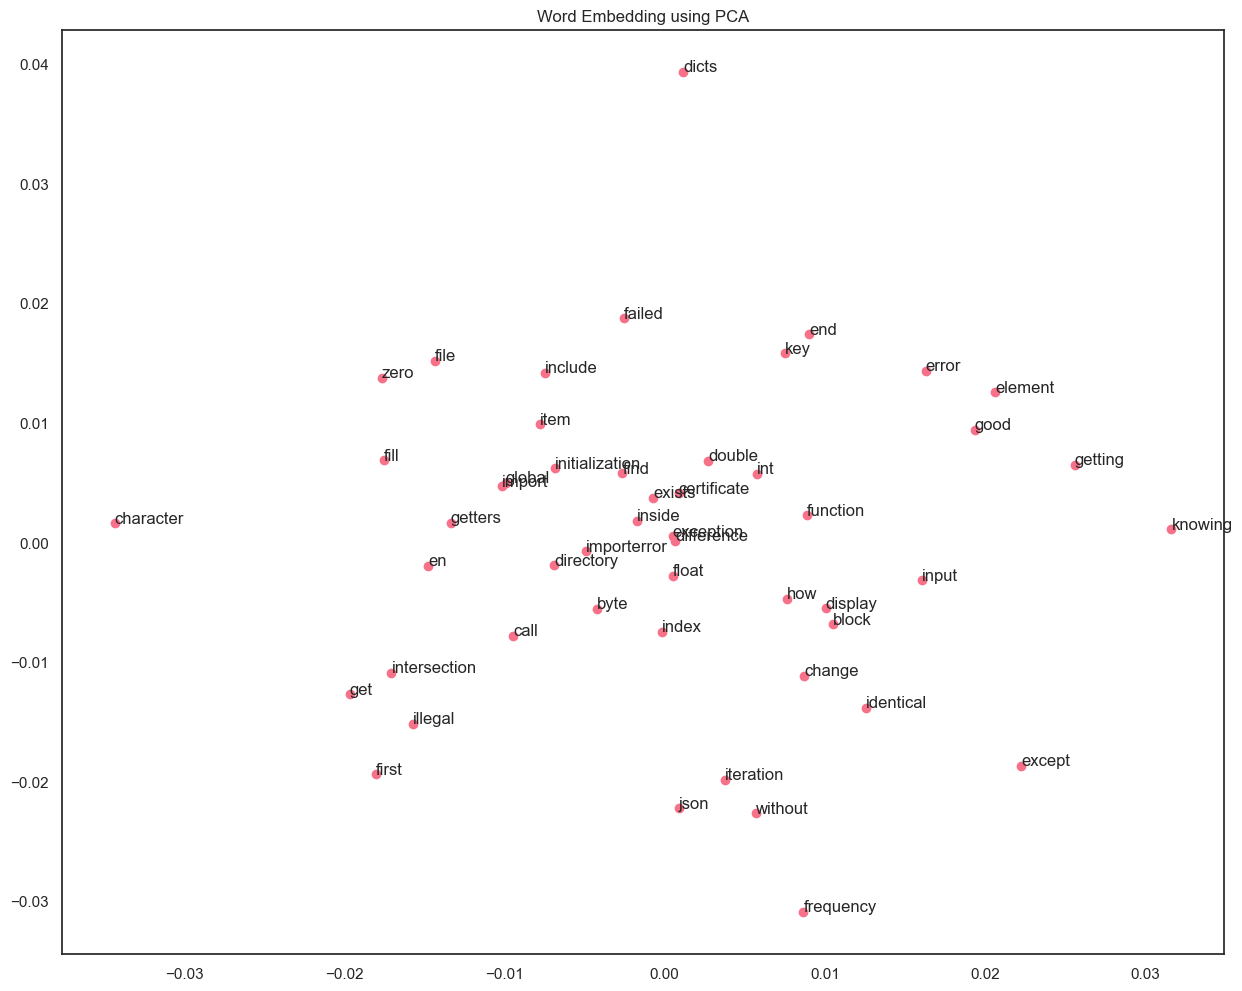

In [62]:
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

plt.figure(figsize = (15, 12))
plt.title('Word Embedding using PCA')
plt.scatter(result[ : , 0], result[ : , 1])
for i, word in enumerate(words):
    plt.annotate(word, xy = (result[i, 0], result[i, 1]))
plt.show()

In [63]:
y = df.Tags
y

0                   <python><dictionary><types><typeof>
1                               <python><json><parsing>
2      <python><string><character-encoding><python-3.x>
3                  <python><integer><string-formatting>
4                   <python><pandas><dataframe><append>
5                                  <python><dictionary>
6                    <python><string><variables><types>
7                        <python><exception><arguments>
8                   <python><properties><getter-setter>
9                             <python><string><integer>
10                         <python><dictionary><pickle>
11             <python><list><python-3.x><map-function>
12       <python><pandas><group-by><pivot><pivot-table>
13                         <python><variables><defined>
14                                       <python><json>
15             <python><dictionary><list-comprehension>
16               <python><lambda><conditional-operator>
17                                     <python><

In [64]:
tags = [tag[1:len(tag) - 1].split('><') for tag in df['Tags']]
tags

[['python', 'dictionary', 'types', 'typeof'],
 ['python', 'json', 'parsing'],
 ['python', 'string', 'character-encoding', 'python-3.x'],
 ['python', 'integer', 'string-formatting'],
 ['python', 'pandas', 'dataframe', 'append'],
 ['python', 'dictionary'],
 ['python', 'string', 'variables', 'types'],
 ['python', 'exception', 'arguments'],
 ['python', 'properties', 'getter-setter'],
 ['python', 'string', 'integer'],
 ['python', 'dictionary', 'pickle'],
 ['python', 'list', 'python-3.x', 'map-function'],
 ['python', 'pandas', 'group-by', 'pivot', 'pivot-table'],
 ['python', 'variables', 'defined'],
 ['python', 'json'],
 ['python', 'dictionary', 'list-comprehension'],
 ['python', 'lambda', 'conditional-operator'],
 ['python', 'string'],
 ['python', 'windows', 'environment-variables', 'pythonpath'],
 ['python', 'arrays', 'intersection'],
 ['python', 'stdout'],
 ['python', 'subprocess'],
 ['python', 'range'],
 ['python', 'json', 'dictionary', 'serialization'],
 ['python', 'path', 'working-dire

### MultiLabelBinazer

In [65]:
# Initialisation du MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Conversion des labels en matrice binaire
binary_labels = mlb.fit_transform(tags)

# Affichage des classes identifiées par MultiLabelBinarizer
print("Classes:", mlb.classes_)

# Affichage de la matrice binaire résultante
print("Matrice binaire:")
print(binary_labels)
print(binary_labels.shape)
print(len(binary_labels))

Classes: ['append' 'arguments' 'arrays' 'beautifulsoup' 'casting'
 'character-encoding' 'conditional-operator' 'csv' 'dataframe' 'defined'
 'dictionary' 'directory' 'element' 'environment-variables' 'exception'
 'file' 'for-loop' 'frequency' 'getter-setter' 'global-variables'
 'group-by' 'import' 'indexing' 'input' 'integer' 'intersection' 'io'
 'json' 'lambda' 'list' 'list-comprehension' 'map-function' 'matplotlib'
 'module' 'numpy' 'pandas' 'parameter-passing' 'parsing' 'path' 'pickle'
 'pivot' 'pivot-table' 'predicate' 'printing' 'properties' 'python'
 'python-3.6' 'python-3.x' 'python-import' 'pythonpath' 'range' 'scipy'
 'scrapy' 'serialization' 'ssl-certificate' 'stdout' 'string'
 'string-formatting' 'subprocess' 'syntax' 'typeof' 'types' 'variables'
 'web-scraping' 'windows' 'working-directory']
Matrice binaire:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(50, 66)
50


### Régression Logistique

In [66]:
train_title, test_title, train_labels, test_labels = train_test_split(X, binary_labels, test_size=0.2, random_state=42)
print("X_train shape : {}".format(train_title.shape))
print("X_test shape : {}".format(test_title.shape))
print("y_train shape : {}".format(train_labels.shape))
print("y_test shape : {}".format(test_title.shape))

X_train shape : (40, 100)
X_test shape : (10, 100)
y_train shape : (40, 66)
y_test shape : (10, 100)


### Performances

In [68]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"
# Ignorer les warnings spécifiques de scikit-learn
warnings.filterwarnings("ignore", message="Label not .* is present in all training examples", category=UserWarning, module="sklearn")

Results_W2V= pd.DataFrame(index=['coverage_error', 'coverage_error_optimized', 'label_ranking_average_precision_score',
                                'label_ranking_average_precision_score_optimized', 'label_ranking_loss', 'label_ranking_loss_optimized', 
                                'Training Time', 'Training Random Time',
                                'Testing Time', 'Testing Random Time'],
                         columns=['LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier'])

# Hyperparamètres
lr_params = {"estimator__C": [100, 10, 1.0, 0.1],
               "estimator__penalty": ["l1", "l2"],
               "estimator__dual": [False],
               "estimator__solver": ["liblinear"]}

random_forest_params = {
    "estimator__n_estimators": [50, 100, 200],
    "estimator__max_depth": [5,6,7],
    "estimator__min_samples_split": [2, 5, 10]}

gb_params = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 4, 5]}

myrandcvs = [lr_params, random_forest_params, gb_params]

# Modèles
classifiers = {'LogisticRegression': LogisticRegression(),'RandomForestClassifier': RandomForestClassifier(),'GradientBoostingClassifier': GradientBoostingClassifier()}

mlflow.set_tracking_uri("http://127.0.0.1:8080")

# Définir une nouvelle expérience MLflow
mlflow.set_experiment("Multilabel_Classification_Experiment_Word2Vec")

for model_name, model in classifiers.items():
    model_ovr = OneVsRestClassifier(model)
    randcv = RandomizedSearchCV(estimator = model_ovr, param_distributions=myrandcvs[0 if model_name == 'LogisticRegression'
                                                                       else 1 if model_name == 'RandomForestClassifier'
                                                                       else 2], n_iter=5, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)
    # Démarrer une nouvelle exécution MLflow
    with mlflow.start_run(run_name=model_name):
        # Training
        start_time_fit = time.time() # en secondes
        model_ovr.fit(train_title, train_labels)
        time_fit = (time.time() - start_time_fit)

        # Random Training
        start_rdcv_time_fit = time.time()
        randcv.fit(train_title, train_labels)
        time_rdcv_fit = (time.time() - start_rdcv_time_fit)

        # Test
        start_time_predict = time.time()
        y_pred = model_ovr.predict(test_title)
        time_predict = (time.time() - start_time_predict)

        # Random Test
        start_rdcv_time_predict = time.time()
        y_rdcv_pred = randcv.predict(test_title)
        time_rdcv_predict = (time.time() - start_rdcv_time_predict)

    

        # Métriques
        coverage_errors = coverage_error(test_labels, y_pred)
        label_ranking_average_precision_scores = label_ranking_average_precision_score(test_labels, y_pred)
        label_ranking_losses = label_ranking_loss(test_labels, y_pred)

        # Métriques Random
        coverage_error_optimized = coverage_error(test_labels, y_rdcv_pred)
        label_ranking_average_precision_score_optimized = label_ranking_average_precision_score(test_labels, y_rdcv_pred)
        label_ranking_loss_optimized = label_ranking_loss(test_labels, y_rdcv_pred)

        # Enregistrer les hyperparamètres, les métriques et le modèle dans MLflow
        mlflow.log_params(randcv.best_params_)
        mlflow.log_metric("coverage_error", coverage_errors)
        mlflow.log_metric("coverage_error_optimized", coverage_error_optimized)
        mlflow.log_metric("label_ranking_average_precision_score", label_ranking_average_precision_scores)
        mlflow.log_metric("label_ranking_average_precision_score_optimized", label_ranking_average_precision_score_optimized)
        mlflow.log_metric("label_ranking_loss", label_ranking_losses)
        mlflow.log_metric("label_ranking_loss_optimized", label_ranking_loss_optimized)
        mlflow.log_metric("Training Time", time_fit)
        mlflow.log_metric("Training Random Time", time_rdcv_fit)
        mlflow.log_metric("Testing Time", time_predict)
        mlflow.log_metric("Testing Random Time", time_rdcv_predict)
        mlflow.sklearn.log_model(randcv.best_estimator_, "model")

        # Mise à jour du DataFrame
        Results_W2V.loc['coverage_error', model_name] = coverage_errors
        Results_W2V.loc['coverage_error_optimized', model_name] = coverage_error_optimized
        Results_W2V.loc['label_ranking_average_precision_score', model_name] = label_ranking_average_precision_scores
        Results_W2V.loc['label_ranking_average_precision_score_optimized', model_name] = label_ranking_average_precision_score_optimized
        Results_W2V.loc['label_ranking_loss', model_name] = label_ranking_losses
        Results_W2V.loc['label_ranking_loss_optimized', model_name] = label_ranking_loss_optimized
        Results_W2V.loc['Training Time', model_name] = time_fit
        Results_W2V.loc['Training Random Time', model_name] = time_rdcv_fit
        Results_W2V.loc['Testing Time', model_name] = time_predict
        Results_W2V.loc['Testing Random Time', model_name] = time_rdcv_predict

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 1 is present in all training examples.
  warnings.w

[CV] END estimator__C=0.1, estimator__dual=False, estimator__penalty=l2, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=1.0, estimator__dual=False, estimator__penalty=l2, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=100, estimator__dual=False, estimator__penalty=l2, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=100, estimator__dual=False, estimator__penalty=l1, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=100, estimator__dual=False, estimator__penalty=l1, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=1.0, estimator__dual=False, estimator__penalty=l2, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=100, estimator__dual=False, estimator__penalty=l1, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=1.0, estimator__dual=False, estimator__penalty=l2, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=100, estim

2024/08/22 16:19:19 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/22 16:19:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run LogisticRegression at: http://127.0.0.1:8080/#/experiments/763838753010057298/runs/996752b0446e450f80470d38a987af59.
2024/08/22 16:19:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8080/#/experiments/763838753010057298.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 2 is present in all training examples.
  warnings.w

[CV] END estimator__max_depth=7, estimator__min_samples_split=5, estimator__n_estimators=50; total time=   1.1s
[CV] END estimator__max_depth=6, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   1.2s
[CV] END estimator__max_depth=6, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   1.3s
[CV] END estimator__max_depth=6, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   1.3s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 20 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 19 is present in all training examples.
  warnings

[CV] END estimator__max_depth=6, estimator__min_samples_split=5, estimator__n_estimators=100; total time=   2.3s
[CV] END estimator__max_depth=7, estimator__min_samples_split=5, estimator__n_estimators=50; total time=   1.2s
[CV] END estimator__max_depth=6, estimator__min_samples_split=5, estimator__n_estimators=100; total time=   2.4s
[CV] END estimator__max_depth=7, estimator__min_samples_split=5, estimator__n_estimators=50; total time=   1.3s
[CV] END estimator__max_depth=6, estimator__min_samples_split=5, estimator__n_estimators=100; total time=   2.5s
[CV] END estimator__max_depth=5, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   1.2s
[CV] END estimator__max_depth=5, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   1.2s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 64 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warning

[CV] END estimator__max_depth=5, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   1.1s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 49 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 50 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 52 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 53 is present in all training examples.
  warni

[CV] END estimator__max_depth=5, estimator__min_samples_split=10, estimator__n_estimators=200; total time=   4.0s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 64 is present in all training examples.
  warnings.warn(


[CV] END estimator__max_depth=5, estimator__min_samples_split=10, estimator__n_estimators=200; total time=   4.4s
[CV] END estimator__max_depth=5, estimator__min_samples_split=10, estimator__n_estimators=200; total time=   4.5s


2024/08/22 16:19:34 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/22 16:19:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForestClassifier at: http://127.0.0.1:8080/#/experiments/763838753010057298/runs/ff0f2a72f7e54552a7e6e6aebbc9de8c.
2024/08/22 16:19:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8080/#/experiments/763838753010057298.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 1 is present in all training examples.
  warnings.w

[CV] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100; total time=   1.6s
[CV] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100; total time=   1.6s
[CV] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100; total time=   1.8s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 35 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 36 is present in all training examples.
  warnings

[CV] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100; total time=   1.9s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 15 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 16 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 8 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 9 is present in all training examples.
  warnings

[CV] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=200; total time=   3.3s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 54 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 62 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 65 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warni

[CV] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100; total time=   2.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100; total time=   1.8s
[CV] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=200; total time=   3.7s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 13 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 14 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 64 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warni

[CV] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100; total time=   2.1s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100; total time=   1.9s
[CV] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=200; total time=   3.9s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 54 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 25 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 51 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 52 is present in all training examples.
  warni

[CV] END estimator__learning_rate=0.01, estimator__max_depth=5, estimator__n_estimators=300; total time=   4.7s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 59 is present in all training examples.
  warnings.warn(


[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100; total time=   1.6s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=5, estimator__n_estimators=300; total time=   5.1s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 64 is present in all training examples.
  warnings.warn(


[CV] END estimator__learning_rate=0.01, estimator__max_depth=5, estimator__n_estimators=300; total time=   5.4s


2024/08/22 16:19:54 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/22 16:19:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run GradientBoostingClassifier at: http://127.0.0.1:8080/#/experiments/763838753010057298/runs/6884e1232d9f4545957e2cce67c79bff.
2024/08/22 16:19:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8080/#/experiments/763838753010057298.


In [69]:
Results_W2V.index.name = 'Metrics Word2Vec'
# Renommer la première colonne
Results_W2V.rename(columns={'index': 'Metrics Word2Vec'}, inplace=False)

Results_W2V

,LogisticRegression,RandomForestClassifier,GradientBoostingClassifier
Metrics Word2Vec,,,
coverage_error,59.5,59.5,59.6
coverage_error_optimized,59.5,59.5,59.6
label_ranking_average_precision_score,0.485909,0.485909,0.355354
label_ranking_average_precision_score_optimized,0.485909,0.485909,0.38452
label_ranking_loss,0.538333,0.538333,0.543047
label_ranking_loss_optimized,0.538333,0.538333,0.541862
Training Time,0.064734,2.613038,2.531573
Training Random Time,1.526265,9.73561,15.064211
Testing Time,0.002061,0.089899,0.009692
